# Generate Dataset

In [50]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [52]:
X,y = make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [54]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [56]:
df.shape

(100, 3)

In [58]:
df.head()

,feature1,feature2,target
0,-1.845695,-0.043112,-61.334166
1,-0.193096,1.377584,65.351984
2,-0.915667,-0.541202,-59.320821
3,0.148817,-0.649364,-76.503920
4,-0.359608,-0.292786,-50.288714


# Visualization

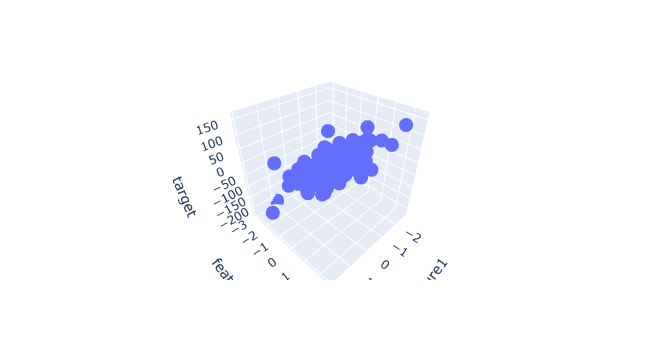

In [61]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

# Train Test Split and model training

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [68]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
# LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

In [76]:
y_pred = lr.predict(X_test)

In [78]:
print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))
print('R2 Score', r2_score(y_test,y_pred))

MAE 30.51583866342184
MSE 1411.4054396356414
R2 Score 0.8503282964786979


# 3D Regression Line Visualization

In [83]:
x = np.linspace(-5, 5, 10)

y = np.linspace(-5, 5, 10)

xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

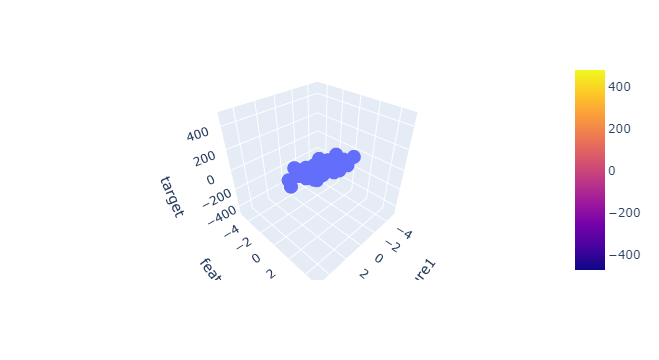

In [85]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [87]:
lr.coef_ #first value is x1 and the second value is x2

array([25.88188027, 69.31340513])

In [89]:
lr.intercept_ # here this is the offset or value of b

4.528944353772452